Farina Fayyaz
28 January 2024

# Statistical Inference Course Project

## Overview
*Investigating the Central Limit Theorem's Effect on Exponentially Distributed Averages*

This project will explore how the Central Limit Theorem (CLT) applies to the distribution of averages drawn from an exponential distribution.

### Code: 
We'll use **R** to  
* **Simulate samples** : Generate 1,000 sets of 40 random values from an exponential distribution with a fixed rate parameter (lambda = 0.2).  
* **Calculate average** : For each set, compute the average of the 40 exponentials.  
* **Analyze distribution** : Examine the distribution of these 1,000 averages. We'll compare it to the theoretical distribution predicted by the CLT for averages of independent random variables.

### Key Points:

* We're focusing on the behavior of averages, not individual exponential values.
* The CLT predicts that, despite the skewed nature of the exponential distribution, the distribution of averages will tend towards normality (bell-shaped) as the sample size increases (in this case, 40).
* This project will visually and statistically explore this convergence towards normality.

### Potential Outcomes:

* We may observe the distribution of averages becoming closer to normal as the number of exponentials averaged increases.
* We can quantify this convergence using statistical tests and visualize it through histograms and density plots.
* This project can provide valuable insights into the applicability of the CLT to real-world scenarios involving skewed distributions.

## Simulations

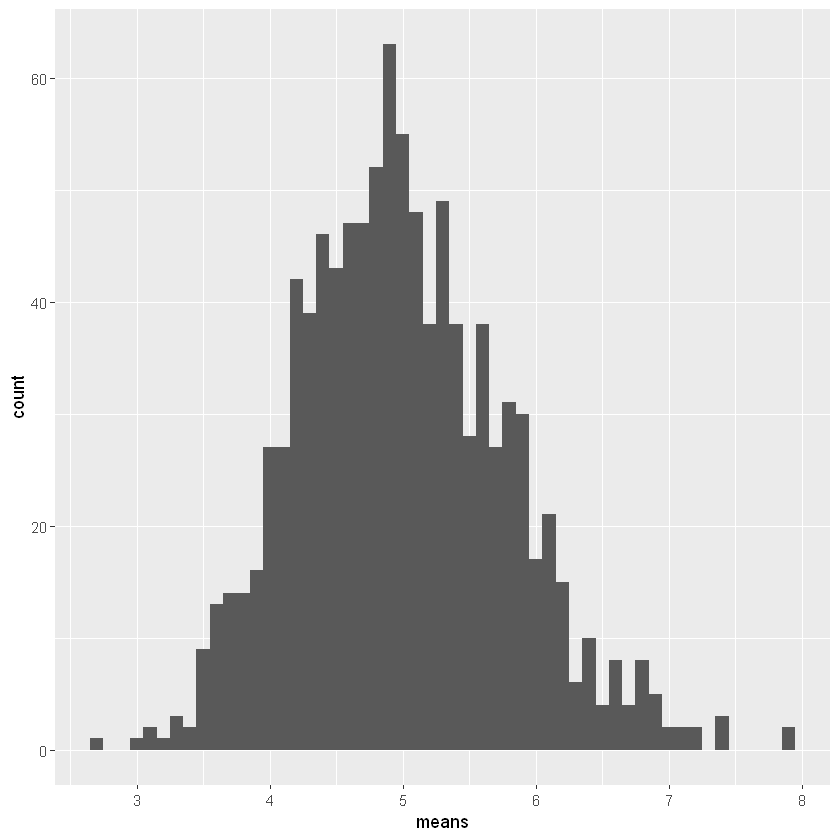

In [3]:
# Importing required libraries
library(ggplot2)

# Defining variables
lambda <- 0.2
n <- 40 # Number of exponentials
nsim <- 1000 # Number of simulations

# Set seed
set.seed(67)

# Performing Simulations
Dist <- matrix(data=rexp(n*nsim, lambda),nrow=nsim) # Storing Exponential Distribution in a Matrix
MeanDist <- data.frame(means=apply(Dist,1,mean)) # Mean of Exponential Distribution

# Plot the means
ggplot(data = MeanDist, aes(x = means)) + 
  geom_histogram(binwidth=0.1) +   
  scale_x_continuous(breaks=round(seq(min(MeanDist$means), max(MeanDist$means), by=1)))

### Sample Mean vs Theoretical Mean
The average value we expect to see, called the mean **$\mu$** of an exponential distribution, is calculated as the inverse of its rate parameter **$\lambda$**.

$\mu = \frac{1}{\lambda}$

This is the Theoretical Mean of the distribution. 

In [4]:
mu = 1/lambda
mu

[1] 5

To calculate Sample Mean, We find the Mean $\bar{X}$ of the Mean Distribution as follows

In [5]:
SampleMean <- mean(MeanDist$means)
SampleMean

[1] 4.99082

This is very close to the theoretical mean.

### Sample Variance vs Theoretical Variance

The expected standard deviation $\sigma$ of an exponential disturibution with rate $\lambda$ and is 
$$\sigma = \frac{\frac{1}{\lambda}}{n}$$. 
The theoretical variance (Var) is simply the square of the theoretical standard deviation.  
$$Var = \sigma^2$$.


In [6]:
sigma = (1/lambda)/n
sigma
var=sigma^2
var

[1] 0.125

[1] 0.015625

This is the theoretical variance of the exponential distribution with 1000 simulations and rate $\lambda$. 
To calculate the sample variance, we find the variance of the mean distribution as follows

In [7]:
Std = sd(MeanDist$means)
Std
SampleVar = var(MeanDist$means)
SampleVar

[1] 0.7818559

[1] 0.6112987

**Comparison:**

- We observed that the theoretical standard deviation **$\sigma$** and the sample standard deviation **Std** are reasonably close, indicating that our simulated data aligns well with the expected distribution.
- Variance is the square of standard deviation, so even minor differences in standard deviation can be slightly amplified when comparing variances. However, **var** and **SampleVar** are still reasonably close, further supporting the consistency between our sample and the theoretical distribution.

## Distribution
<div style="text-align: justify;">Traditionally, analyzing population means and standard deviations involves comparing them to theoretical expectations, often assuming a normal distribution. However, this comparison can sometimes lack depth or context. To address this, we've enriched the analysis by incorporating both calculated and expected means alongside standard deviations. This expanded approach allows for a more nuanced understanding of how observed population characteristics align with what we might anticipate under the normal distribution model. By examining discrepancies between calculated and expected means, we can potentially uncover hidden trends or unexpected deviations. Additionally, comparing standard deviations alongside means provides a more complete picture of how data is spread around the central tendency. This multifaceted approach, encompassing both means and standard deviations, sheds light on the relationship between actual population characteristics and the theoretical expectations of a normal distribution, potentially revealing valuable insights that might otherwise be missed.
</div>



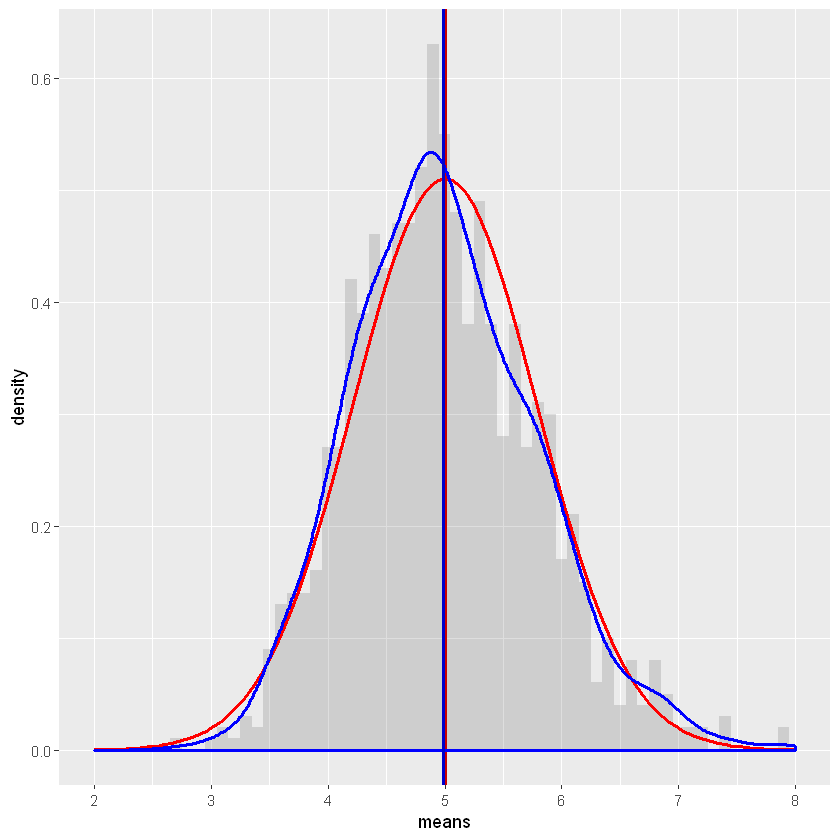

In [24]:
# plot the means
library(ggplot2)
ggplot(data = MeanDist, aes(x = means)) + 
  geom_histogram(binwidth = 0.1, aes(y = ..density..), alpha = 0.2, na.rm = TRUE) + 
  stat_function(fun = dnorm, args = list(mean = mu, sd = Std), colour = "red", size = 1) + 
  geom_vline(xintercept = mu, size = 1, colour = "#CC0000") + 
  geom_density(colour = "blue", size = 1) +
  geom_vline(xintercept = SampleMean, size = 1, colour = "#0000CC") + 
  scale_x_continuous(breaks = seq(mu - 3, mu + 3, 1), limits = c(mu - 3, mu + 3))

The calculated distribution of means from randomly sampled exponential distributions, strikingly overlaps with the normal distribution defined by the corresponding expected values based on lambda